In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = np.load('/content/X.npy')
Y = np.load('/content/Y.npy')


print("Original X shape:", X.shape)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


print("X_train shape before reshaping:", X_train.shape)
print("X_test shape before reshaping:", X_test.shape)


X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


print("X_train shape after reshaping:", X_train_reshaped.shape)
print("X_test shape after reshaping:", X_test_reshaped.shape)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)


print("X_train shape after scaling:", X_train_scaled.shape)
print("X_test shape after scaling:", X_test_scaled.shape)



Original X shape: (2062, 64, 64)
X_train shape before reshaping: (1649, 64, 64)
X_test shape before reshaping: (413, 64, 64)
X_train shape after reshaping: (1649, 4096)
X_test shape after reshaping: (413, 4096)
X_train shape after scaling: (1649, 4096)
X_test shape after scaling: (413, 4096)


Shape of X: (2062, 64, 64)


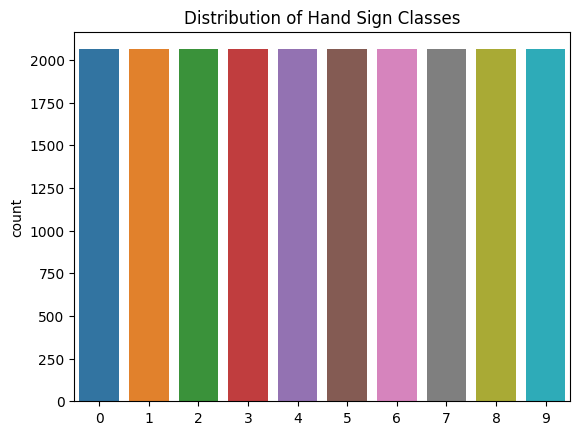

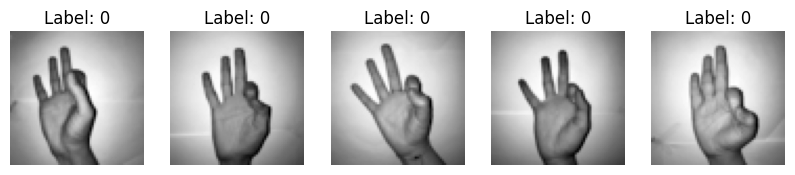

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of X:", X.shape)

sns.countplot(Y)
plt.title("Distribution of Hand Sign Classes")
plt.show()

def plot_sample_images(X, Y, num_samples=5):
    plt.figure(figsize=(10, 2))
    image_shape = X.shape[1:]
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i].reshape(image_shape), cmap='gray')

        label_index = np.argmax(Y[i]) if len(Y[i]) > 1 else Y[i]
        plt.title(f"Label: {label_index}")
        plt.axis('off')
    plt.show()

plot_sample_images(X, Y)


In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Y_train_labels = np.argmax(Y_train, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, Y_train_labels)

Y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(Y_test_labels, Y_pred_log_reg))
print(confusion_matrix(Y_test_labels, Y_pred_log_reg))
print(classification_report(Y_test_labels, Y_pred_log_reg))


Logistic Regression Accuracy: 0.7602905569007264
[[36  1  0  0  0  0  1  2  0  0]
 [ 1 40  1  2  1  0  3  0  0  0]
 [ 0  1 36  1  1  3  5  1  2  0]
 [ 0  0  1 25  0  0  5  0  4  0]
 [ 1  0  1  0 24  3  2  1  0  0]
 [ 1  0  3  0  4 25  3  1  0  1]
 [ 1  1  5  7  0  3 23  0  0  1]
 [ 1  0  0  0  3  0  0 33  1  0]
 [ 0  1  2  7  4  0  1  0 30  0]
 [ 1  1  0  0  0  1  1  0  0 42]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        40
           1       0.89      0.83      0.86        48
           2       0.73      0.72      0.73        50
           3       0.60      0.71      0.65        35
           4       0.65      0.75      0.70        32
           5       0.71      0.66      0.68        38
           6       0.52      0.56      0.54        41
           7       0.87      0.87      0.87        38
           8       0.81      0.67      0.73        45
           9       0.95      0.91      0.93        46

    accuracy            

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3949 - loss: 2.0479 - val_accuracy: 0.6212 - val_loss: 1.2656
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8135 - loss: 0.7160 - val_accuracy: 0.6939 - val_loss: 1.1733
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9162 - loss: 0.3269 - val_accuracy: 0.6939 - val_loss: 0.9391
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9285 - loss: 0.2331 - val_accuracy: 0.7212 - val_loss: 1.0074
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9568 - loss: 0.1874 - val_accuracy: 0.7424 - val_loss: 1.0654
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9572 - loss: 0.2111 - val_accuracy: 0.7515 - val_loss: 0.9789
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9553 - loss: 0.2056 - val_accuracy: 0.7667 - val_loss: 0.9508
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9841 - loss: 0.0562 - val_accuracy: 0.7758 - val_loss: 0.870

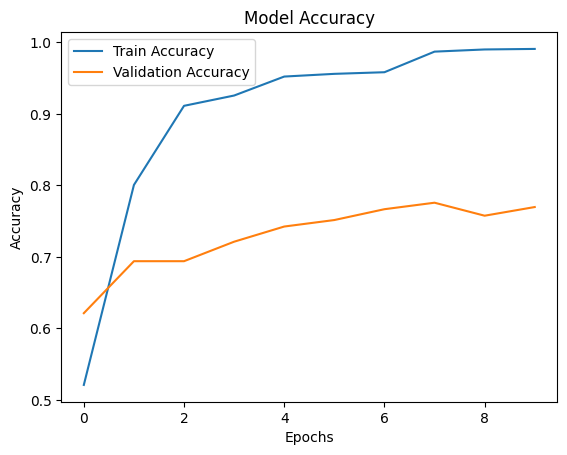

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Y_train_labels = np.argmax(Y_train, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

model = Sequential()
model.add(Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(Y_train_labels)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, Y_train_labels, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_scaled, Y_test_labels)
print("Neural Network Accuracy:", accuracy)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
